In [18]:
# KNN Classification
from pandas import read_csv
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [19]:
filename = 'glass.csv'
names = ['Rl', 'Na', 'Mg', 'Al', 'Si', 'k', 'Ca', 'Ba', 'Fe', 'Type']

In [20]:
dataframe = read_csv(filename, names=names)
dataframe

,Rl,Na,Mg,Al,Si,k,Ca,Ba,Fe,Type
0,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
1,1.52101,13.64,4.49,1.1,71.78,0.06,8.75,0,0,1
2,1.51761,13.89,3.6,1.36,72.73,0.48,7.83,0,0,1
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0,0,1
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0,0,1
...,...,...,...,...,...,...,...,...,...,...
210,1.51623,14.14,0,2.88,72.61,0.08,9.18,1.06,0,7
211,1.51685,14.92,0,1.99,73.06,0,8.4,1.59,0,7
212,1.52065,14.36,0,2.02,73.42,0,8.44,1.64,0,7
213,1.51651,14.38,0,1.94,73.61,0,8.48,1.57,0,7


In [21]:
dataframe.isnull()

,Rl,Na,Mg,Al,Si,k,Ca,Ba,Fe,Type
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
210,False,False,False,False,False,False,False,False,False,False
211,False,False,False,False,False,False,False,False,False,False
212,False,False,False,False,False,False,False,False,False,False
213,False,False,False,False,False,False,False,False,False,False


In [22]:
dataframe.isnull().values.any()

False

In [23]:
dataframe.isnull().sum()

Rl      0
Na      0
Mg      0
Al      0
Si      0
k       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [24]:
dataframe.dtypes

Rl      object
Na      object
Mg      object
Al      object
Si      object
k       object
Ca      object
Ba      object
Fe      object
Type    object
dtype: object

In [25]:
dataframe['Rl'] = (dataframe['Rl'].str.split()).apply(lambda x: float(x[0]))

ValueError: could not convert string to float: 'RI'

In [37]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
for i in dataframe:
    dataframe[i]=label_encoder.fit_transform(dataframe[i])

In [27]:
array = dataframe.values
X = array[:, 0:9]
Y = array[:, 9]

In [28]:
num_folds = 10
kfold = KFold(n_splits=10)

In [29]:
model = KNeighborsClassifier(n_neighbors=12)
results = cross_val_score(model, X, Y, cv=kfold)

In [30]:
print(results.mean())

0.4922077922077922


### Grid Search for Algorithm Tuning

In [31]:
# Grid Search for Algorithm Tuning
import numpy
from pandas import read_csv
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [32]:
n_neighbors = numpy.array(range(1,40))
param_grid = dict(n_neighbors=n_neighbors)

In [33]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X, Y)

C:\Users\D_R\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [34]:
print(grid.best_score_)
print(grid.best_params_)

0.6930232558139535
{'n_neighbors': 4}


### Visualizing the CV results

In [35]:
import pandas as pd
pd.DataFrame(k_scores).sort_values(0)

NameError: name 'k_scores' is not defined

C:\Users\D_R\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\D_R\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\D_R\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\D_R\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\D_R\anaconda3\lib\site-packages\sklearn\mod

C:\Users\D_R\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\D_R\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\D_R\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


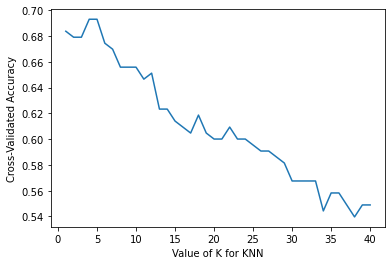

In [36]:
import matplotlib.pyplot as plt 
%matplotlib inline
# choose k between 1 to 41
k_range = range(1, 41)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, Y, cv=5)
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()